# Analysis of EDA data in the Time Domain

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns


df = pd.read_csv('/Users/aditya_mac/Downloads/PMEmo2019/Final_EDA_mean.csv')
df_last = pd.read_csv('/Users/aditya_mac/Downloads/PMEmo2019/Final_EDA_Normalization_last.csv')

## Functions/Feature Analysis Techniques

In [104]:
# Plot for eda of person:1-10 with time-stamp for song-k (one can choose value of k)
def lineplot(df):
    plt.rcParams['figure.figsize'] = [12, 8]
    songs = df.musicId.drop_duplicates().tolist()
    k = 1 # Song whose plot we need to visualize
#     list_p = []
    y = df[df['musicId'] == k]['frameTime']
    for i in range(1,11):
        person = 'Person' + str(i)
        x = df[df['musicId'] == k][person]
        plt.plot(y,x,label = person)
    plt.plot(y,df[df['musicId'] == k]['Mean_of_All_Persons'])
    plt.legend()
    plt.show()

In [105]:
# Runs only for non-negative X, hence can't be used here.
def selectKbest(X,Y):
    bestfeatures = SelectKBest(score_func = chi2,k=10)
    fit = bestfeatures.fit(X,Y)
    featureScores = pd.DataFrame({'Features' : X.columns, 'Score' : fit.score_})
    print(featureScores.nlargest(10,'Score'))

In [106]:
def getVar(df):
    X = df.iloc[:,4:]
    Y1 = df.iloc[:,2]
    Y2 = df.iloc[:,3]
    return X,Y1,Y2

In [107]:
# Feature importance (uses Tree based classifier i.e. Extra Tree Classifier)
# Considers only 2 significant digits for calculating it, low accuracy

def feature_importance_using_Tree(X,Y1,Y2,key):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()
    model1 = ExtraTreesClassifier()
    X_v = (X.values*10e2).astype('int')
    Y1_v = (Y1.values*10e2).astype('int')
    Y2_v = (Y2.values*10e2).astype('int')

    # Key = 0 is for the Arousal
    if(key == 0):
        model.fit(X_v,Y1_v.ravel())
        print(model.feature_importances_)
        f = pd.Series(model.feature_importances_,index = X.columns)
        f.nlargest(10).plot(kind='barh')
        plt.show()

    # Key = 1 is for the Valence
    if(key == 1):
        model1.fit(X_v,Y2_v.ravel())
        print(model1.feature_importances_)
        f1 = pd.Series(model1.feature_importances_,index = X.columns)
        f1.nlargest(10).plot(kind='barh')
        plt.show()

## When Normalization is done in Beginning i.e. for each Song separately

In [108]:
# Using data with normaliation done in beginning
df
df['Mean_of_All_Persons'] = df.iloc[:,4:].mean(axis = 1)
df

,musicId,frameTime,Arousal(mean),Valence(mean),Person1,Person2,Person3,Person4,Person5,Person6,Person7,Person8,Person9,Person10,Mean_of_All_Persons
0,1,15.5,0.437663,0.559975,-0.534616,0.726772,0.706958,-0.308624,-0.267277,0.700768,1.463271,0.481371,0.312392,-0.384494,0.289652
1,1,16.0,0.437775,0.560650,-0.580261,0.657948,0.815412,-0.362499,-0.267277,0.653101,1.253027,0.333406,0.150413,-0.439052,0.221422
2,1,16.5,0.443125,0.559900,-0.455063,0.595143,0.931116,-0.419834,-0.321231,0.663717,0.886001,0.481371,0.309361,-0.358920,0.231166
3,1,17.0,0.442887,0.560212,-0.357254,0.521703,0.945567,-0.483792,-0.363065,0.647827,0.483989,0.481371,0.361460,0.096278,0.233408
4,1,17.5,0.444563,0.563337,-0.389424,0.462009,0.996170,-0.525376,-0.404508,0.653101,0.448894,0.185343,0.219751,0.067295,0.171325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28394,996,48.0,0.908763,0.571100,-1.654464,0.090815,1.059226,-1.313178,-0.528285,-1.454767,-0.228312,-1.618800,-0.764105,1.226342,-0.518553
28395,996,48.5,0.913112,0.565875,-1.621259,0.070609,1.059226,-1.243961,-0.699511,-1.461360,-0.413822,-1.487926,-1.006171,1.226342,-0.557783
28396,996,49.0,0.896775,0.563337,-1.720657,0.057188,1.039659,-1.347899,-0.699511,-1.406441,-0.642800,-1.416483,-0.764105,1.275885,-0.562516
28397,996,49.5,0.872537,0.566687,-1.654464,0.021054,1.044999,-1.313178,-0.613617,-0.962741,-0.737495,-1.392695,-1.006171,1.770018,-0.484429


In [109]:
# Statistical analysis of Data
df.describe()

,musicId,frameTime,Arousal(mean),Valence(mean),Person1,Person2,Person3,Person4,Person5,Person6,Person7,Person8,Person9,Person10,Mean_of_All_Persons
count,28399.00000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000,28399.000000
mean,518.69263,30.751294,0.631984,0.607299,-0.312819,-0.262426,-0.285706,-0.269442,-0.273007,-0.282936,-0.280582,-0.321991,-0.311942,-0.292484,-0.289334
std,294.16058,12.312066,0.177581,0.159863,0.861972,0.901122,0.901936,0.892687,0.890373,0.898688,0.899502,0.875515,0.869085,0.899480,0.408234
min,1.00000,15.500000,0.115763,0.126675,-3.723827,-4.015887,-3.836834,-3.421046,-4.675616,-4.361615,-4.511653,-3.684097,-6.756092,-5.112862,-1.775708
25%,257.00000,21.500000,0.510406,0.496106,-0.965422,-0.953907,-0.969996,-0.945308,-0.956954,-0.963743,-0.951682,-0.987726,-0.970480,-0.982465,-0.553018
50%,535.00000,28.000000,0.658238,0.631987,-0.422771,-0.359585,-0.390546,-0.392217,-0.364425,-0.387121,-0.394292,-0.423563,-0.417162,-0.424282,-0.270170
75%,777.00000,37.000000,0.777269,0.737119,0.250904,0.368577,0.328867,0.349052,0.355421,0.339507,0.346441,0.271862,0.267416,0.322520,-0.004211
max,996.00000,88.000000,0.971325,0.929687,5.195753,4.616952,5.945622,4.552540,6.274064,4.944604,6.196776,6.898782,5.251556,4.369427,1.263235


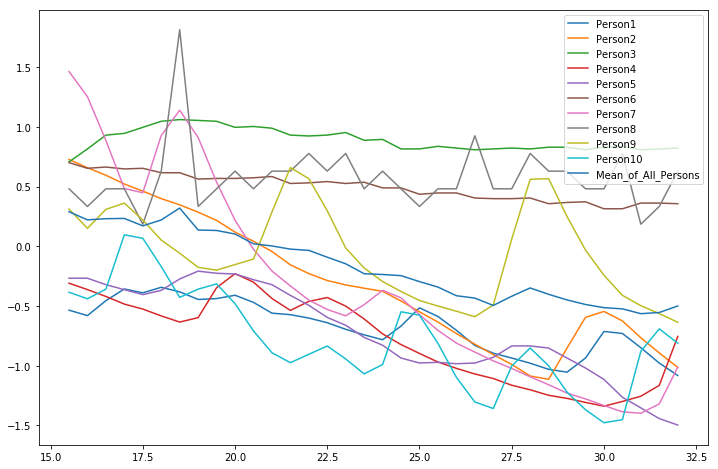

In [110]:
# Line plot for a particular k, k denotes song
lineplot(df)

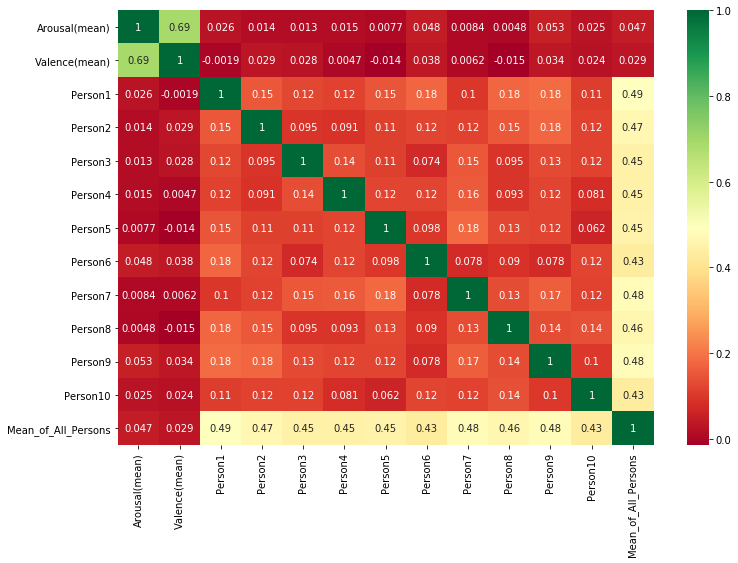

In [111]:
# Heatmap of the data, gives correlation between different features of the data (Nomalization = beginning)
data = df.iloc[:,2:]
corrmat = data.corr()
top_corr_features = corrmat.index
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.08971186 0.09274422 0.0923002  0.09007156 0.08980126 0.09154361
 0.08945823 0.09121632 0.0920058  0.09177148 0.08937546]


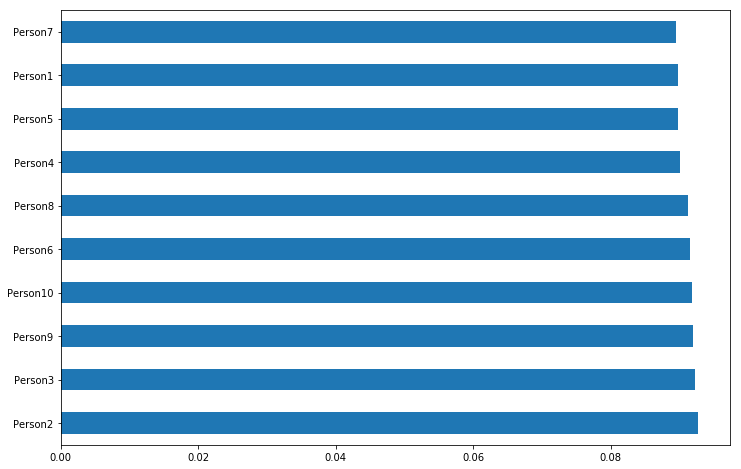

In [112]:
X,Y1,Y2 = getVar(df)

# Key = 1 means that it is for Valence
feature_importance_using_Tree(X,Y1,Y2,1)

## When Normalization is Done at the End to the Whole Data

In [113]:
# Using data with normaliation done at end
df_last
df_last['Mean_of_All_Persons'] = df_last.iloc[:,4:].mean(axis = 1)
df_last

,musicId,frameTime,Arousal(mean),Valence(mean),time(s),Person1,Person2,Person3,Person4,Person5,Person6,Person7,Person8,Person9,Person10,Mean_of_All_Persons
0,1,15.5,0.437663,0.559975,15.5,0.197085,0.597089,-0.767418,1.063540,0.983050,0.070128,1.141007,-1.133049,0.358436,0.040023,1.640899
1,1,16.0,0.437775,0.560650,16.0,0.172541,0.586199,-0.763691,1.051526,0.983050,0.067775,1.108049,-1.133309,0.344876,0.032356,1.677216
2,1,16.5,0.443125,0.559900,16.5,0.239862,0.576262,-0.759715,1.038741,0.980701,0.068299,1.050515,-1.133049,0.358183,0.043617,1.723947
3,1,17.0,0.442887,0.560212,17.0,0.292456,0.564642,-0.759218,1.024479,0.978880,0.067515,0.987496,-1.133049,0.362544,0.107588,1.772121
4,1,17.5,0.444563,0.563337,17.5,0.275157,0.555196,-0.757479,1.015206,0.977076,0.067775,0.981995,-1.133570,0.350680,0.103515,1.812323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28394,996,48.0,0.908763,0.571100,48.0,-0.696308,1.156869,-0.322415,-0.807412,-0.952331,0.018143,1.306017,-0.088798,-1.316546,-0.866588,4.130057
28395,996,48.5,0.913112,0.565875,48.5,-0.696074,1.154694,-0.322415,-0.806912,-0.952850,0.017359,1.293728,-0.085934,-1.316788,-0.866588,4.174384
28396,996,49.0,0.896775,0.563337,49.0,-0.696776,1.153249,-0.325147,-0.807663,-0.952850,0.023890,1.278561,-0.084371,-1.316546,-0.866348,4.218727
28397,996,49.5,0.872537,0.566687,49.5,-0.696308,1.149360,-0.324401,-0.807412,-0.952590,0.076657,1.272288,-0.083850,-1.316788,-0.863952,4.268455


In [114]:
df_last.describe()

,musicId,frameTime,Arousal(mean),Valence(mean),time(s),Person1,Person2,Person3,Person4,Person5,Person6,Person7,Person8,Person9,Person10,Mean_of_All_Persons
count,28399.00000,28399.000000,28399.000000,28399.000000,28399.000000,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,2.839900e+04,28399.000000
mean,518.69263,30.751294,0.631984,0.607299,30.751294,4.871791e-15,-9.818650e-15,8.974315e-15,-2.470036e-15,-5.757370e-15,-1.400326e-14,8.638598e-15,2.138134e-15,-5.386069e-15,-9.258335e-15,2.795572
std,294.16058,12.312066,0.177581,0.159863,12.312066,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.121190
min,1.00000,15.500000,0.115763,0.126675,15.500000,-5.362085e+00,-3.359691e+00,-2.640662e+00,-5.403634e+00,-2.572259e+00,-3.726623e+00,-2.809796e+00,-4.152102e+00,-3.450908e+00,-2.499909e+00,0.722705
25%,257.00000,21.500000,0.510406,0.496106,21.500000,-8.127209e-01,-7.460398e-01,-8.532748e-01,-8.156774e-01,-8.583148e-01,-8.298044e-01,-7.936785e-01,-8.154818e-01,-7.971823e-01,-7.776989e-01,1.970659
50%,535.00000,28.000000,0.658238,0.631987,28.000000,-2.098715e-01,-1.382986e-01,-6.947471e-02,-1.873514e-01,-1.329390e-01,-1.686359e-01,-1.529699e-01,-6.926727e-02,-1.195505e-01,-2.187351e-01,2.563702
75%,777.00000,37.000000,0.777269,0.737119,37.000000,6.795602e-01,5.995178e-01,6.319520e-01,7.262055e-01,7.022973e-01,7.281667e-01,6.688387e-01,6.999945e-01,5.643858e-01,6.548128e-01,3.389207
max,996.00000,88.000000,0.971325,0.929687,88.000000,4.774187e+00,4.925648e+00,5.035517e+00,3.572787e+00,5.115846e+00,4.851379e+00,3.682401e+00,4.386631e+00,5.076956e+00,4.970564e+00,8.389454


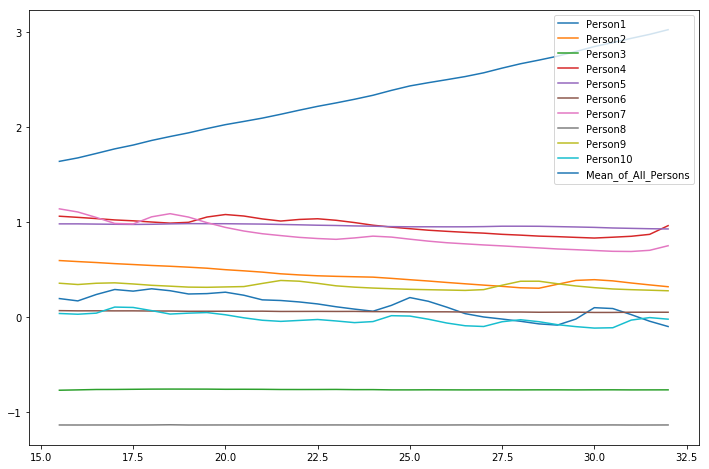

In [115]:
# Line plot for a particular k, k denotes song
lineplot(df_last)

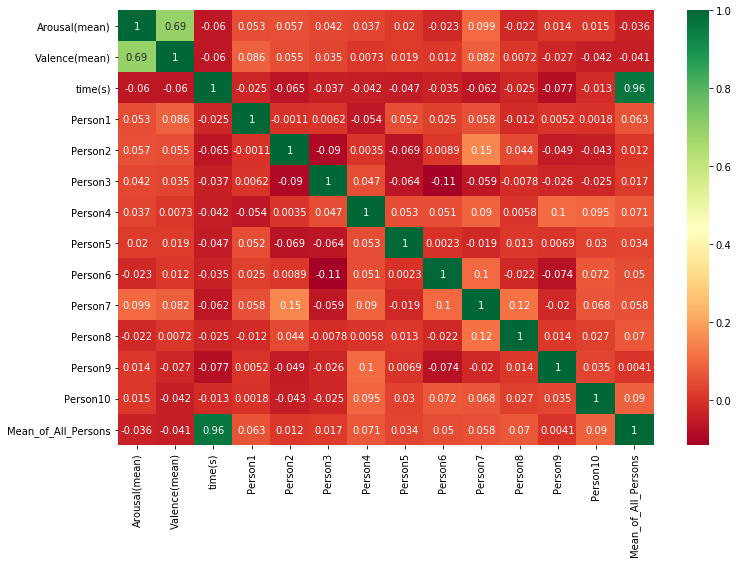

In [116]:
# Heatmap of the data, gives correlation between different features of the data (Nomalization = End)
data = df_last.iloc[:,2:]
corrmat = data.corr()
top_corr_features = corrmat.index
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.09105476 0.09218302 0.09146568 0.09134087 0.09127652 0.08986044
 0.09064564 0.09116672 0.09125469 0.09035864 0.08939302]


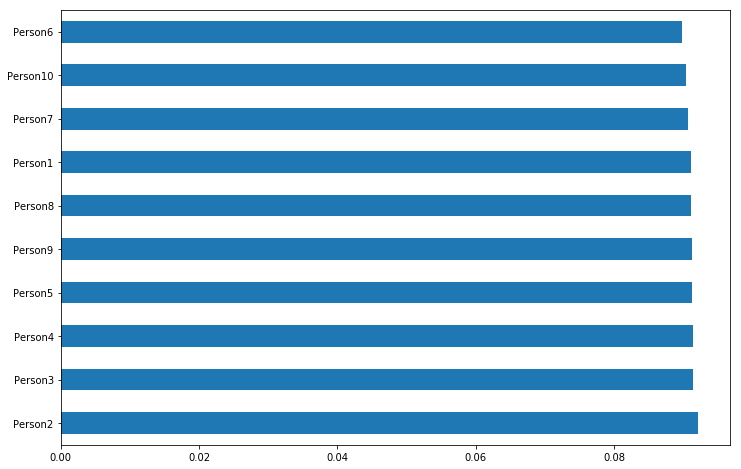

In [117]:
X_all,Y1_all,Y2_all = getVar(df)

# Key = 1 means that it is for Valence
feature_importance_using_Tree(X_all,Y1_all,Y2_all,1)

# Other Important Features that could be extracted
1. Statistical Features
2. Hjorth Features
3. SCR Features

### Statistical Features

In [119]:
# Kurtosis of the data
from scipy.stats import norm, kurtosis
kurtosis(df_last.iloc[:,5:])

array([ 1.78700017,  1.04326392,  0.87046651,  0.96514156,  0.23868095,
        0.17147819, -0.08537548,  0.46716915,  1.64705743,  1.01570842,
        1.36063666])

In [127]:
# Skeness of the data
from scipy.stats import skew
skew_data = skew(df_last.iloc[:,5:])
skew_data

array([0.3753551 , 0.72053527, 0.69101375, 0.25290824, 0.63467004,
       0.64358063, 0.57913346, 0.46204087, 0.86809712, 0.89001237,
       1.092255  ])

In [128]:
# Mean of the Data
mean_data = np.mean(df_last.iloc[:,5:]).tolist()
mean_data

[4.8717910816346595e-15,
 -9.818649956215733e-15,
 8.974315162069926e-15,
 -2.4700361009569523e-15,
 -5.757369767853409e-15,
 -1.40032591553103e-14,
 8.638597699343474e-15,
 2.138133698247247e-15,
 -5.386069186108195e-15,
 -9.258335067566747e-15,
 2.7955721872409094]

In [129]:
# Standard Deviation of the Data
std_data = np.std(df_last.iloc[:,5:]).tolist()
std_data

[0.9999823935912635,
 0.9999823935912723,
 0.9999823935912654,
 0.9999823935912817,
 0.9999823935912601,
 0.9999823935912657,
 0.9999823935912585,
 0.9999823935912705,
 0.9999823935912677,
 0.9999823935912743,
 1.1211702395109964]

In [137]:
# Variance of the Data
var_data = np.var(df_last.iloc[:,5:]).tolist()
var_data

[0.9999647874925126,
 0.9999647874925301,
 0.9999647874925165,
 0.9999647874925491,
 0.9999647874925058,
 0.999964787492517,
 0.9999647874925026,
 0.9999647874925266,
 0.9999647874925212,
 0.9999647874925343,
 1.2570227059651449]

## Hjorth Features

In [136]:
# Activity of the Data
activity = np.sum((df_last.iloc[:,5:] - mean_data)**2)
activity

Person1                28398.000000
Person2                28398.000000
Person3                28398.000000
Person4                28398.000000
Person5                28398.000000
Person6                28398.000000
Person7                28398.000000
Person8                28398.000000
Person9                28398.000000
Person10               28398.000000
Mean_of_All_Persons    35698.187827
dtype: float64

In [147]:
# Mobility of the Data
# var_derivative = (2/df.shape[0])*(np.sum(df_last.iloc[:,5:] - mean_data))

In [126]:
# Complexity of the Data